In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

# Veri Seti Oluşturma
np.random.seed(42)
data_size = 1000
data = {
    "Yuzey": np.linspace(0, 100, data_size),
    "Cd": np.random.uniform(0.2, 0.4, data_size),
    "Basinc": np.random.uniform(-50, 50, data_size),
    "Hiz": np.random.uniform(10, 30, data_size),
    "X": np.random.uniform(0, 10, data_size),
    "Y": np.random.uniform(0, 10, data_size),
    "Wind Speed": np.random.uniform(0, 10, data_size),
    "Temperature": np.random.uniform(-10, 40, data_size),
    "Road Slope": np.random.uniform(-5, 10, data_size),
    "Humidity": np.random.uniform(20, 80, data_size),
}

# Ekstra Hesaplamalar
fuel_cell_efficiency = 0.6 + (data["Temperature"] - 25) * -0.005
fuel_consumption = (
    data["Cd"] * data["Hiz"] ** 2 / (fuel_cell_efficiency * 100)
)

# Veri Setine Yeni Parametreler Ekleme
data["Fuel Cell Efficiency"] = fuel_cell_efficiency
data["Fuel Consumption"] = fuel_consumption
df = pd.DataFrame(data)

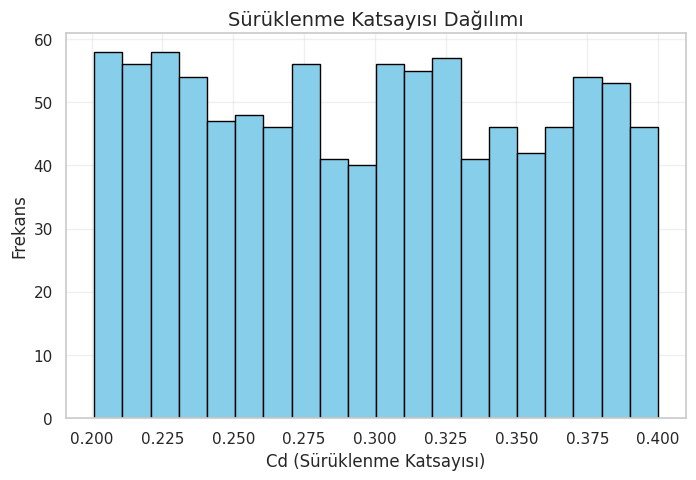

In [ ]:
# 1. Veri Keşfetme ve Görselleştirme
sns.set_theme(style="whitegrid")

# Sürüklenme Katsayısı Histogramı
plt.figure(figsize=(8, 5))
plt.hist(df["Cd"], bins=20, color="skyblue", edgecolor="black")
plt.title("Sürüklenme Katsayısı Dağılımı", fontsize=14)
plt.xlabel("Cd (Sürüklenme Katsayısı)", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


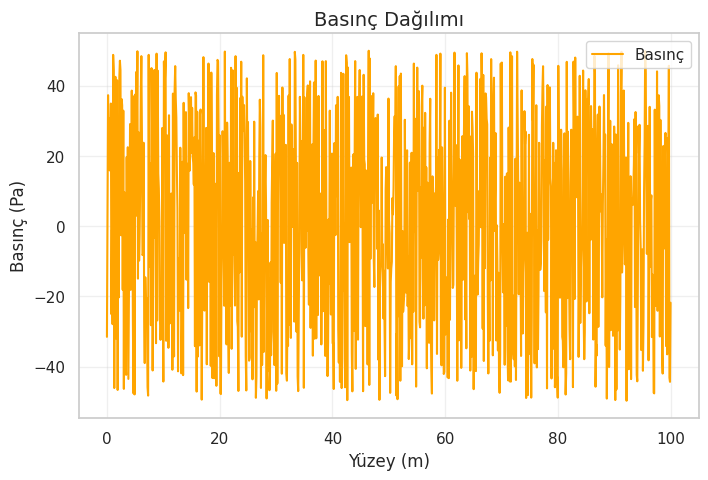

In [ ]:
# Basınç Dağılımı
plt.figure(figsize=(8, 5))
plt.plot(df["Yuzey"], df["Basinc"], color="orange", label="Basınç")
plt.title("Basınç Dağılımı", fontsize=14)
plt.xlabel("Yüzey (m)", fontsize=12)
plt.ylabel("Basınç (Pa)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

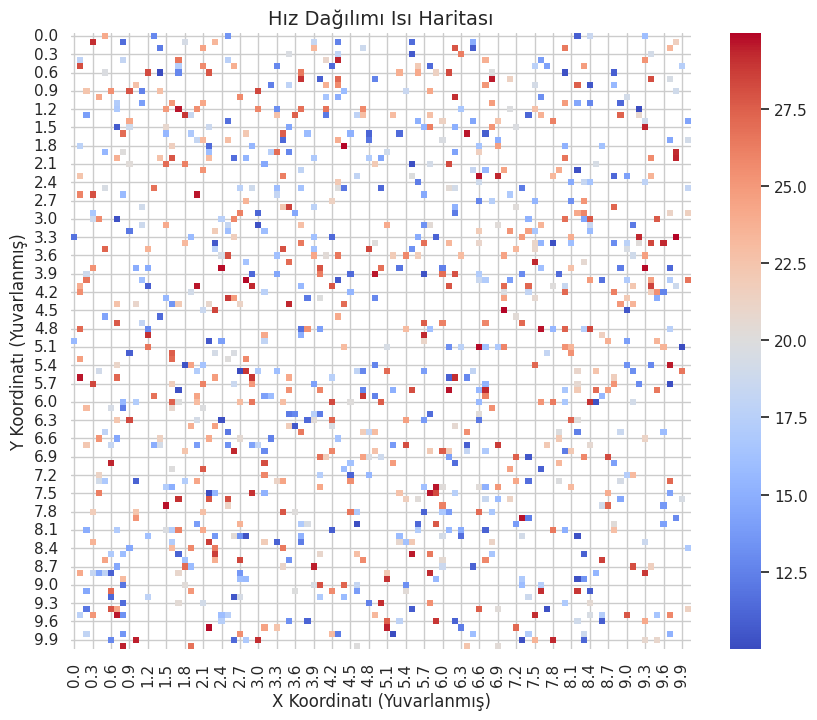

In [ ]:
# Hız Dağılımı Isı Haritası
pivot_data = pd.DataFrame({
    "X": df["X"].round(1),
    "Y": df["Y"].round(1),
    "Hiz": df["Hiz"]
}).pivot_table(index="Y", columns="X", values="Hiz")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, cmap="coolwarm", cbar=True)
plt.title("Hız Dağılımı Isı Haritası", fontsize=14)
plt.xlabel("X Koordinatı (Yuvarlanmış)", fontsize=12)
plt.ylabel("Y Koordinatı (Yuvarlanmış)", fontsize=12)
plt.show()

In [ ]:
# 2. Makine Öğrenmesi Modelleri
X = df[["Cd", "Basinc", "Hiz", "Wind Speed", "Temperature", "Road Slope"]]
y = df["Fuel Consumption"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Tahminler
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.1066


In [ ]:
# 3. Optimizasyon (Cd Minimizasyonu)
def objective(Cd):
    temp_efficiency = 0.6 + (df["Temperature"] - 25) * -0.005
    fuel_consumption_pred = Cd * df["Hiz"] ** 2 / (temp_efficiency * 100)
    return np.mean((fuel_consumption_pred - df["Fuel Consumption"]) ** 2)

result = minimize(objective, x0=[0.3], bounds=[(0.2, 0.4)])
print(f"Optimize Edilmiş Cd: {result.x[0]:.4f}")

Optimize Edilmiş Cd: 0.2997


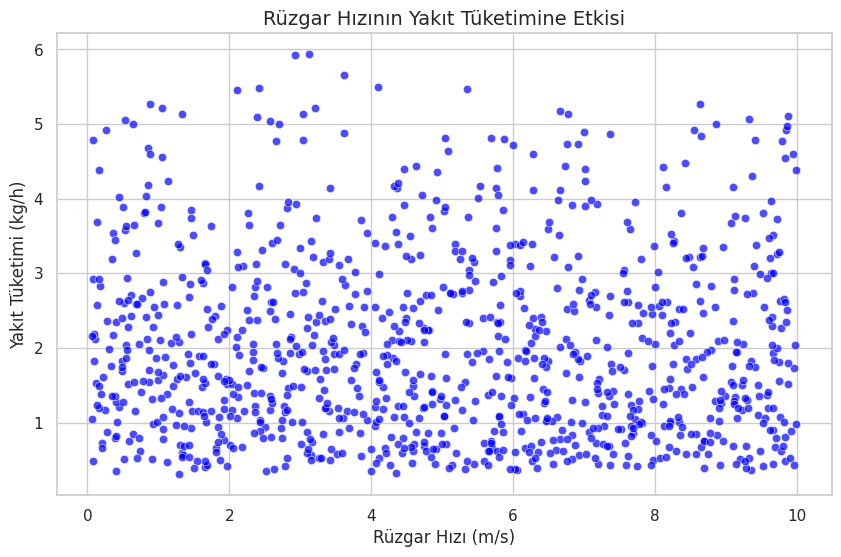

In [ ]:
# 4. Sonuçların Görselleştirilmesi
# Rüzgar Hızının Yakıt Tüketimine Etkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Wind Speed", y="Fuel Consumption", alpha=0.7, color="blue")
plt.title("Rüzgar Hızının Yakıt Tüketimine Etkisi", fontsize=14)
plt.xlabel("Rüzgar Hızı (m/s)", fontsize=12)
plt.ylabel("Yakıt Tüketimi (kg/h)", fontsize=12)
plt.grid(True)
plt.show()


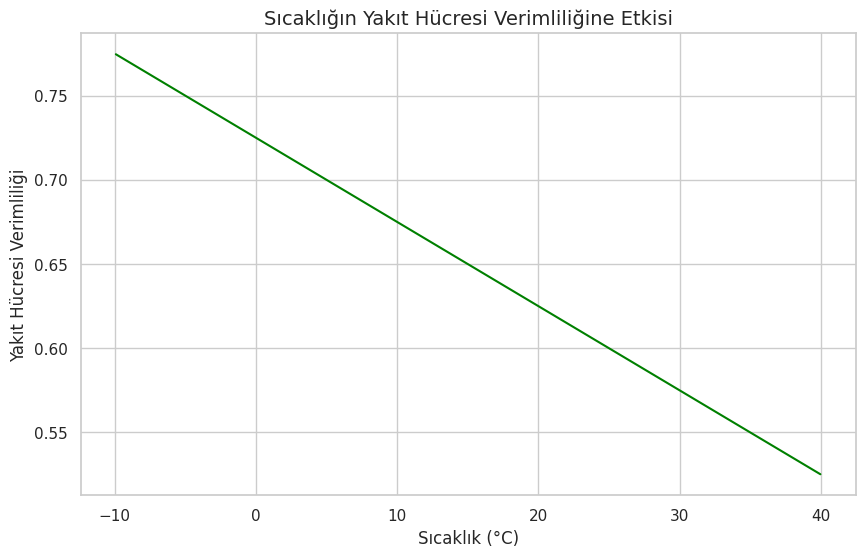

In [ ]:
# Sıcaklığın Yakıt Hücresi Verimliliğine Etkisi
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Temperature", y="Fuel Cell Efficiency", color="green")
plt.title("Sıcaklığın Yakıt Hücresi Verimliliğine Etkisi", fontsize=14)
plt.xlabel("Sıcaklık (°C)", fontsize=12)
plt.ylabel("Yakıt Hücresi Verimliliği", fontsize=12)
plt.grid(True)
plt.show()

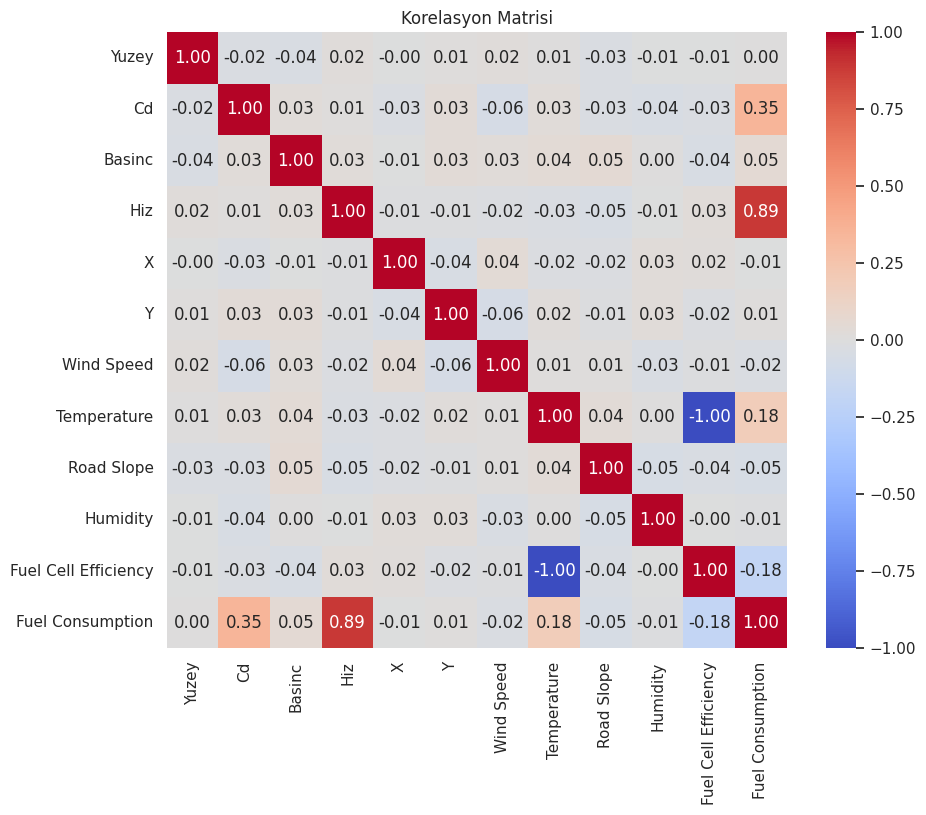

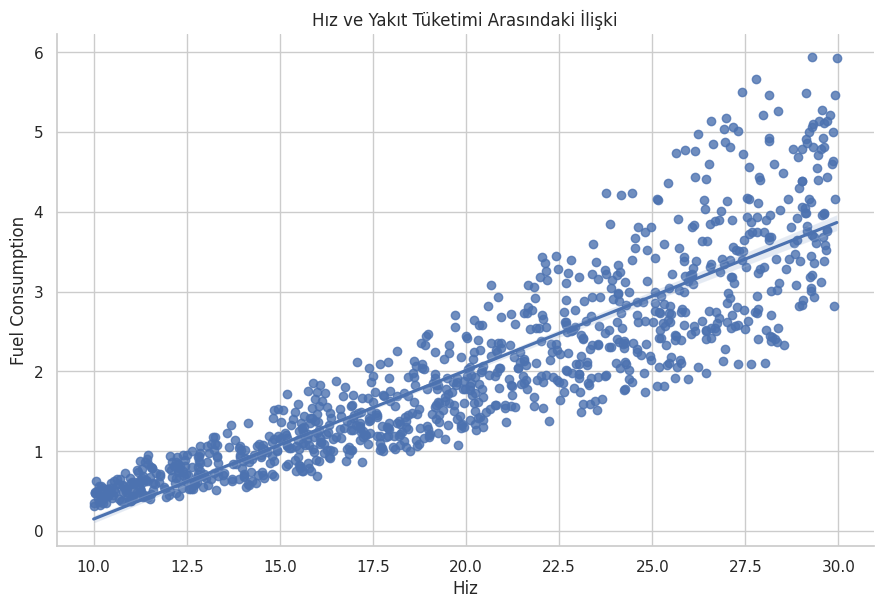

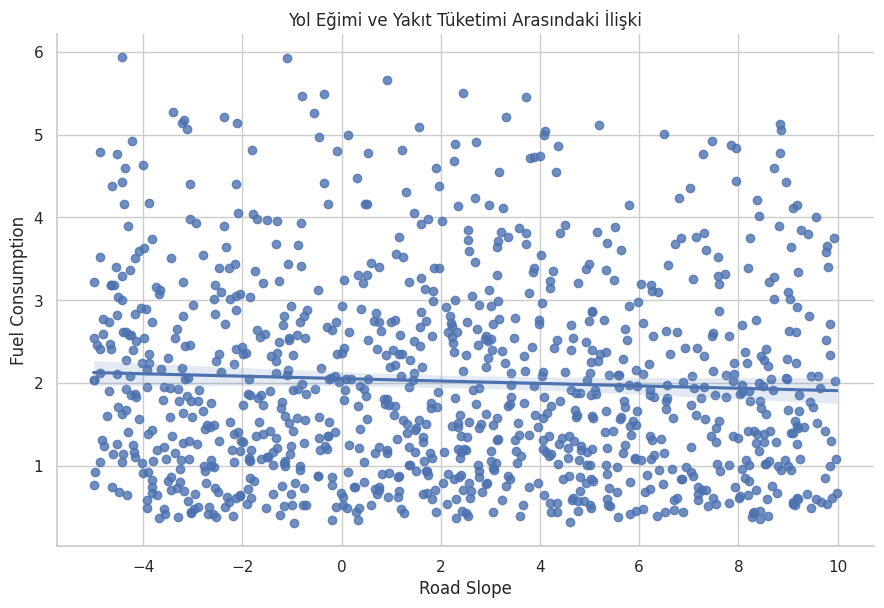

In [ ]:
# Korelasyon Matrisi
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

# Regresyon Analizleri (Hız ve Yol Eğimi vs. Yakıt Tüketimi)
sns.lmplot(x="Hiz", y="Fuel Consumption", data=df, aspect=1.5, height=6)
plt.title("Hız ve Yakıt Tüketimi Arasındaki İlişki")
plt.show()

sns.lmplot(x="Road Slope", y="Fuel Consumption", data=df, aspect=1.5, height=6)
plt.title("Yol Eğimi ve Yakıt Tüketimi Arasındaki İlişki")
plt.show()


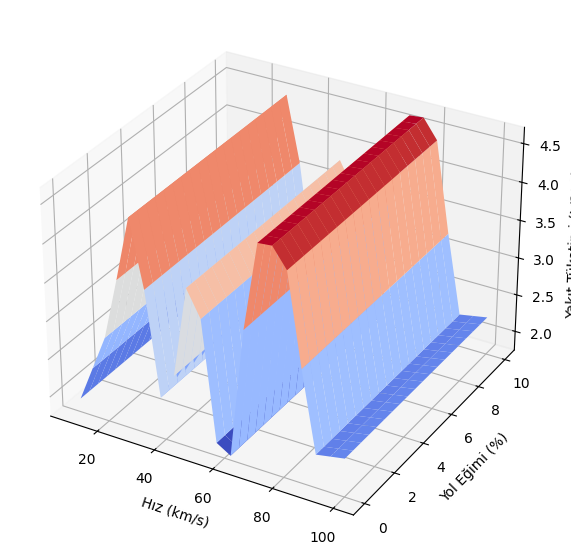

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Örnek veri oluşturma
data = {
    "Hiz": np.linspace(10, 100, 10),
    "Road Slope": np.linspace(0, 10, 10),
    "Fuel Consumption": np.random.uniform(1, 5, 10),
}
df = pd.DataFrame(data)

# Grid oluşturma
x = np.linspace(df["Hiz"].min(), df["Hiz"].max(), 20)
y = np.linspace(df["Road Slope"].min(), df["Road Slope"].max(), 20)
X, Y = np.meshgrid(x, y)

# Yakıt tüketimi değerlerini grid'e eşleme
Z = np.interp(X.ravel(), df["Hiz"].values, df["Fuel Consumption"].values).reshape(X.shape)

# 3D yüzeyi çizme
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')

# Eksen etiketleri
ax.set_xlabel('Hız (km/s)')
ax.set_ylabel('Yol Eğimi (%)')
ax.set_zlabel('Yakıt Tüketimi (L/100km)')

plt.show()


In [16]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Örnek veri oluşturma
data = {
    "Hiz": np.linspace(10, 100, 10),
    "Road Slope": np.linspace(0, 10, 10),
    "Fuel Consumption": np.random.uniform(1, 5, 10),
}
df = pd.DataFrame(data)

# Grid oluşturma
x = np.linspace(df["Hiz"].min(), df["Hiz"].max(), 20)
y = np.linspace(df["Road Slope"].min(), df["Road Slope"].max(), 20)
X, Y = np.meshgrid(x, y)

# Yakıt tüketimi değerlerini grid'e eşleme
Z = np.interp(X.ravel(), df["Hiz"].values, df["Fuel Consumption"].values).reshape(X.shape)

# Plotly ile 3D yüzeyi çizme
fig = go.Figure(data=[go.Surface(
    z=Z,
    x=X,
    y=Y,
    colorscale='Viridis',  # Coolwarm yerine Viridis renk skalası
    colorbar=dict(title="Yakıt Tüketimi")
)])

# Eksen etiketleri
fig.update_layout(
    scene=dict(
        xaxis_title='Hız (km/s)',
        yaxis_title='Yol Eğimi (%)',
        zaxis_title='Yakıt Tüketimi (L/100km)',
    ),
    title='3D Yakıt Tüketimi Yüzeyi',
    autosize=True
)

fig.show()



In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

# Mevcut veriye göre X ve y'yi ayırıyoruz
X = df[["Hiz", "Road Slope"]]  # Diğer sütunlar eksik, sadece var olanları kullanıyoruz
y = df["Fuel Consumption"]

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahminler ve performans değerlendirmesi
predictions = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions):.4f}")

# Eğer optimize etmek istediğiniz bir parametre varsa, bu bölümü veri setinize göre düzenleyebilirsiniz
def objective(Cd):
    # Örnek bir hesaplama (gerçek modelinize göre düzeltilmeli)
    fuel_consumption_pred = Cd * df["Hiz"] ** 2 / 100  # Bu formülünüzü geliştirebilirsiniz
    return np.mean((fuel_consumption_pred - df["Fuel Consumption"]) ** 2)

# Optimizasyon
result = minimize(objective, x0=[0.3], bounds=[(0.2, 0.4)])
print(f"Optimize Edilmiş Cd: {result.x[0]:.4f}")



Mean Squared Error: 0.7279
Optimize Edilmiş Cd: 0.2000
